# SDSC2005 EX4 Li Shing Hei 57139371
# Data 2

# Data preparation

In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
xls = pd.ExcelFile('Ex4_data2.xlsx')
HSBC = pd.read_excel(xls, '0005.HK')
GALA = pd.read_excel(xls, '0027.HK')
HL = pd.read_excel(xls, '0101.HK')

## Table 2

# HSBC

Get the data up to 2022-12-30

In [2]:
hsbcprice_training = HSBC.loc[:5749,["Date","Adj Close"]]
hsbcprice_training['Date'] = pd.to_datetime(hsbcprice_training['Date'])
hsbcprice_training.set_index('Date', inplace = True)
hsbcprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)


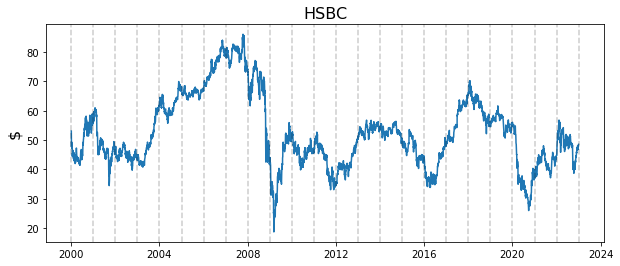

In [3]:
plt.figure(figsize=(10,4))
plt.plot(hsbcprice_training.Price)
plt.title('HSBC',fontsize=16)
plt.ylabel('$',fontsize=16)
for year in range(2000,2024):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--',alpha=0.2)

In [4]:
hsbcprice_training.isnull().values.any()

True

Fill in missing value for HSBC

In [5]:
hsbcprice_training = hsbcprice_training.interpolate(method ='linear')
#Fill in the missing value using linear method

In [6]:
hsbcprice_training.isnull().values.any()

False

### ACF and PACF in the 0-order of integration

p-value: 0.135499234805543


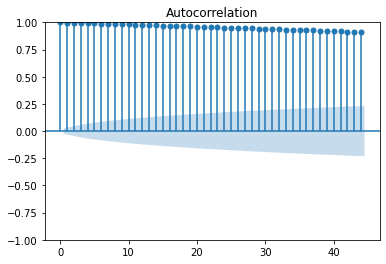

In [7]:
hsbcAcf_plot = plot_acf(hsbcprice_training.Price, lags=44)

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(hsbcprice_training.Price)
print(f'p-value: {adf_test[1]}')

We can observe the data is not stationary because the value of ACF never goes to 0

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


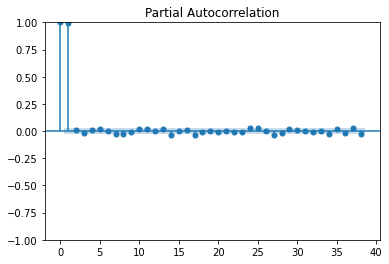

In [8]:
hsbcPacf_plot = plot_pacf(hsbcprice_training.Price)

### Auto_arima to find the best ARIMA order 

In [9]:
from pmdarima import auto_arima
HSBCfit=auto_arima(hsbcprice_training.Price,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12844.022, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12845.728, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12845.737, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12842.029, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12846.962, Time=1.34 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 7.669 seconds


### Stationary HSBC

p-value: 0.0


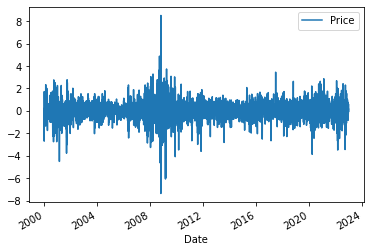

In [10]:
hsbcprice_training_diff = hsbcprice_training.diff().dropna()
hsbcprice_training_diff.plot()

adf_test = adfuller(hsbcprice_training_diff.Price)
print(f'p-value: {adf_test[1]}')
#p-value < 0.05, the past value is stationary

### ACF and PACF after the 1-order of integration

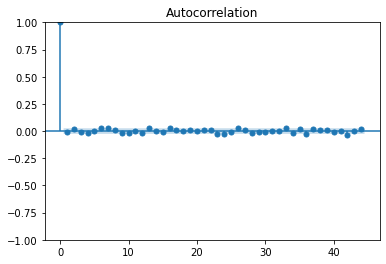

In [11]:
hsbcAcf_plot = plot_acf(hsbcprice_training_diff.Price, lags=44)
#MA(1)

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


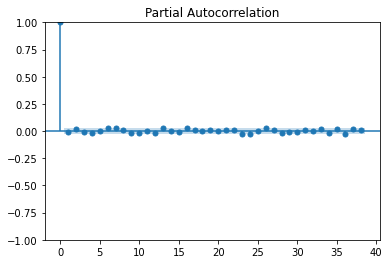

In [12]:
hsbcPacf_plot = plot_pacf(hsbcprice_training_diff.Price)
#AR(1)

### ARIMA model summary

In [13]:
from statsmodels.tsa.arima.model import ARIMA
HSBCmodel = ARIMA(hsbcprice_training.Price, order=(0,1,0))
HSBCmodel_fit = HSBCmodel.fit()
print(HSBCmodel_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5750
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -6420.014
Date:                Tue, 07 Mar 2023   AIC                          12842.029
Time:                        20:23:45   BIC                          12848.686
Sample:                             0   HQIC                         12844.346
                               - 5750                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.5464      0.004    138.065      0.000       0.539       0.554
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):             30500.52
Prob(Q):                              0.59   Pr

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# GALAXY ENT.

In [14]:
galaprice_training = GALA.loc[:5748,["Date","Adj Close"]]
galaprice_training['Date'] = pd.to_datetime(galaprice_training['Date'])
galaprice_training.set_index('Date', inplace = True)
galaprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)
galaprice_training

,Price
Date,
2000-01-04,0.565728
2000-01-05,0.538789
2000-01-06,0.520829
2000-01-07,0.538789
2000-01-10,0.529809
...,...
2022-12-22,51.700001
2022-12-23,51.150002
2022-12-28,52.200001


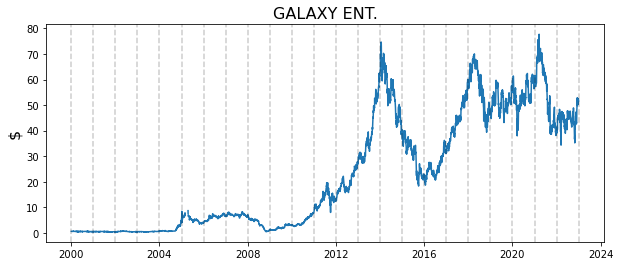

In [15]:
plt.figure(figsize=(10,4))
plt.plot(galaprice_training.Price)
plt.title('GALAXY ENT.',fontsize=16)
plt.ylabel('$',fontsize=16)
for year in range(2000,2024):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--',alpha=0.2)

In [16]:
galaprice_training.isnull().values.any()

True

Fill in missing value for GALAXY ENT.

In [17]:
galaprice_training = galaprice_training.interpolate(method ='linear')
#Fill in the missing value using linear method
galaprice_training.isnull().values.any()

False

### ACF and PACF in the 0-order of integration

p-value: 0.7715003405036716


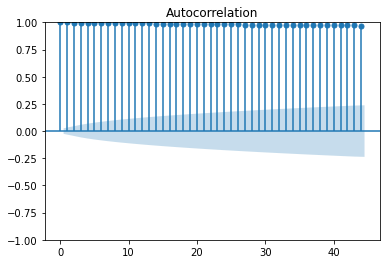

In [18]:
galaAcf_plot = plot_acf(galaprice_training.Price, lags=44)

adf_test = adfuller(galaprice_training.Price)
print(f'p-value: {adf_test[1]}')

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


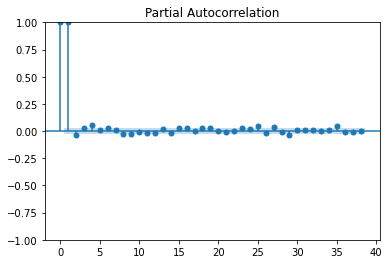

In [19]:
galaPacf_plot = plot_pacf(galaprice_training.Price)

### Auto_arima to find the best ARIMA order 

In [20]:
galafit=auto_arima(galaprice_training.Price,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13518.674, Time=3.90 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13554.262, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13550.174, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13549.756, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13552.995, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13534.802, Time=1.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13533.070, Time=1.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13518.280, Time=4.53 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13530.225, Time=1.42 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=13529.595, Time=4.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=13517.794, Time=4.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=13516.423, Time=4.73 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=13530.903, Time=0.68 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=13534.888, Time=3.00 sec
 ARIMA(1,1,4)(0,0,0

### Stationary GALAXY ENT.

p-value: 1.781570518187049e-29


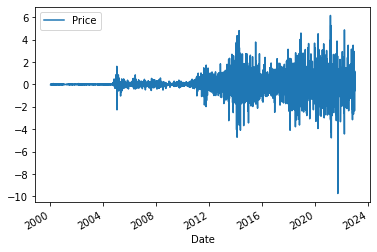

In [21]:
galaprice_training_diff = galaprice_training.diff().dropna()
galaprice_training_diff.plot()

adf_test = adfuller(galaprice_training_diff.Price)
print(f'p-value: {adf_test[1]}')
#p-value <0.05, the past value is stationary

### ACF and PACF after the 1-order of integration

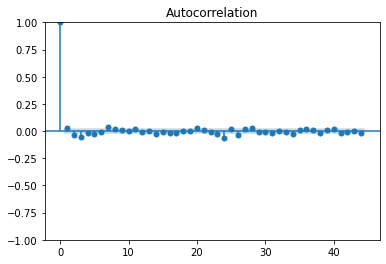

In [22]:
galaAcf_plot = plot_acf(galaprice_training_diff.Price, lags=44)
#MA(3)

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


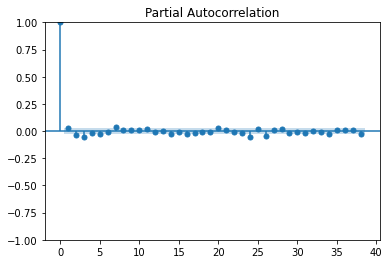

In [23]:
galaPacf_plot = plot_pacf(galaprice_training_diff.Price)
#AR(2)

### ARIMA model summary

In [24]:
GALAmodel = ARIMA(galaprice_training.Price, order=(2,1,3))
GALAmodel_fit = GALAmodel.fit()
print(GALAmodel_fit.summary())

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5749
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -6751.557
Date:                Tue, 07 Mar 2023   AIC                          13515.114
Time:                        20:24:45   BIC                          13555.054
Sample:                             0   HQIC                         13529.014
                               - 5749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5774      0.011    146.537      0.000       1.556       1.598
ar.L2         -0.9525      0.010    -91.652      0.000      -0.973      -0.932
ma.L1         -1.5491      0.013   -118.237      0.0

# HANG LUNG

In [25]:
HLprice_training = HL.loc[:5748,["Date","Adj Close"]]
HLprice_training['Date'] = pd.to_datetime(HLprice_training['Date'])
HLprice_training.set_index('Date', inplace = True)
HLprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)
HLprice_training

,Price
Date,
2000-01-04,2.718446
2000-01-05,2.569781
2000-01-06,2.527305
2000-01-07,2.569781
2000-01-10,2.569781
...,...
2022-12-22,14.720000
2022-12-23,14.800000
2022-12-28,15.360000


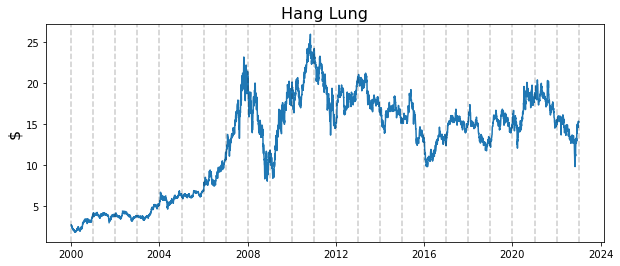

In [26]:
plt.figure(figsize=(10,4))
plt.plot(HLprice_training.Price)
plt.title('Hang Lung',fontsize=16)
plt.ylabel('$',fontsize=16)
for year in range(2000,2024):
    plt.axvline(pd.to_datetime(str(year)), color='k', linestyle='--',alpha=0.2)

Fill in missing value for GALAXY ENT.

In [27]:
HLprice_training = HLprice_training.interpolate(method ='linear')
#Fill in the missing value using linear method
HLprice_training.isnull().values.any()

False

### ACF and PACF in the 0-order of integration

p-value: 0.21617233592882523


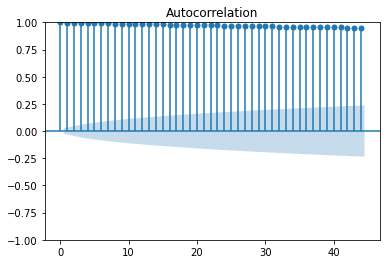

In [28]:
HLAcf_plot = plot_acf(HLprice_training.Price, lags=44)

adf_test = adfuller(HLprice_training.Price)
print(f'p-value: {adf_test[1]}')

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


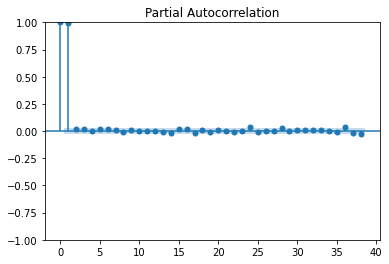

In [29]:
HLPacf_plot = plot_pacf(HLprice_training.Price)

### Auto_arima to find the best ARIMA order 

In [30]:
HLfit=auto_arima(HLprice_training.Price,trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1860.872, Time=1.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1864.516, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1863.990, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1863.850, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1862.854, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1858.868, Time=3.82 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1861.741, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1857.024, Time=3.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1863.945, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1861.945, Time=0.31 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1855.550, Time=0.66 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1862.204, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1862.343, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1862.317, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0]          

### Stationary HANG LUNG

p-value: 0.0


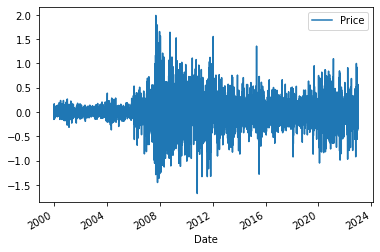

In [31]:
HLprice_training_diff = HLprice_training.diff().dropna()
HLprice_training_diff.plot()

adf_test = adfuller(HLprice_training_diff.Price)
print(f'p-value: {adf_test[1]}')
#p-value <0.05, the past value is stationary

### ACF and PACF after the 1-order of integration

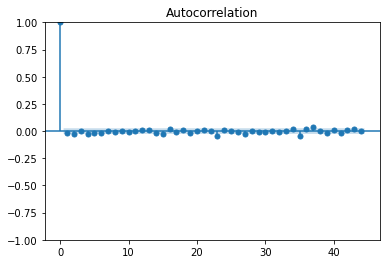

In [32]:
HLAcf_plot = plot_acf(HLprice_training_diff.Price, lags=44)
#MA(1)

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


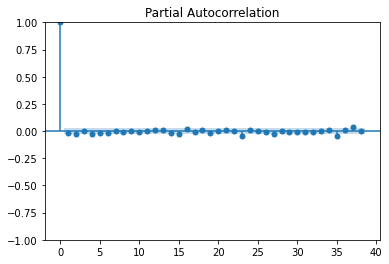

In [33]:
HLPacf_plot = plot_pacf(HLprice_training_diff.Price)
#AR(1)

### ARIMA model summary

In [34]:
HLmodel = ARIMA(HLprice_training.Price, order=(1,1,1))
HLmodel_fit = HLmodel.fit()
print(HLmodel_fit.summary())

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 5749
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -924.775
Date:                Tue, 07 Mar 2023   AIC                           1855.550
Time:                        20:25:04   BIC                           1875.519
Sample:                             0   HQIC                          1862.500
                               - 5749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9087      0.033     27.569      0.000       0.844       0.973
ma.L1         -0.9272      0.030    -31.311      0.000      -0.985      -0.869
sigma2         0.0808      0.001     96.905      0.0

# Table 3

## Data preparation

In [35]:
import statsmodels.api as sm

Training set

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats
import statsmodels.formula.api as smf
HSI = pd.read_excel(xls, 'HSI')
DJI = pd.read_excel(xls, 'DJI')
SSEC = pd.read_excel(xls, 'SSEC')

#Training sets
HSI_training = HSI.loc[1:5749,["Date","Adj Close"]]
DJI_training = DJI.loc[1:5749,["Date","Adj Close"]]
SSEC_training = SSEC.loc[:5696,["Date","Adj Close"]]

HSI_training['Date'] = pd.to_datetime(HSI_training['Date'])
HSI_training.set_index('Date', inplace = True)
HSI_training.rename(columns={"Adj Close": "HSI_Price"}, inplace=True)

DJI_training['Date'] = pd.to_datetime(DJI_training['Date'])
DJI_training.set_index('Date', inplace = True)
DJI_training.rename(columns={"Adj Close": "DJI_Price"}, inplace=True)

SSEC_training['Date'] = pd.to_datetime(SSEC_training['Date'])
SSEC_training.set_index('Date', inplace = True)
SSEC_training.rename(columns={"Adj Close": "SSEC_Price"}, inplace=True)

Test sets

In [37]:
#Test sets

HSI_test = HSI.loc[5750:,["Date","Adj Close"]]
DJI_test = DJI.loc[5750:,["Date","Adj Close"]]
SSEC_test = SSEC.loc[5697:,["Date","Adj Close"]]

HSI_test['Date'] = pd.to_datetime(HSI_test['Date'])
HSI_test.set_index('Date', inplace = True)
HSI_test.rename(columns={"Adj Close": "HSI_Price"}, inplace=True)

DJI_test['Date'] = pd.to_datetime(DJI_test['Date'])
DJI_test.set_index('Date', inplace = True)
DJI_test.rename(columns={"Adj Close": "DJI_Price"}, inplace=True)

SSEC_test['Date'] = pd.to_datetime(SSEC_test['Date'])
SSEC_test.set_index('Date', inplace = True)
SSEC_test.rename(columns={"Adj Close": "SSEC_Price"}, inplace=True)

## HSBC Predictive model

In [38]:
hsbcprice_training = HSBC.loc[1:5749,["Date","Adj Close","Volume"]]
hsbcprice_training['Date'] = pd.to_datetime(hsbcprice_training['Date'])
hsbcprice_training.set_index('Date', inplace = True)
hsbcprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)

hsbcprice_training = pd.concat([hsbcprice_training, HSI_training], axis=1)
hsbcprice_training = pd.concat([hsbcprice_training, DJI_training], axis=1)
hsbcprice_training = pd.concat([hsbcprice_training, SSEC_training], axis=1)

hsbcprice_training = hsbcprice_training.interpolate(method ='linear')

hsbcprice_training_z = hsbcprice_training.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
#standardizing the training set with z-score, which makes the coefficient to be standardized coefficient in the result
hsbcprice_training

,Price,Volume,HSI_Price,DJI_Price,SSEC_Price
Date,,,,,
2000-01-04,52.085232,6.895378e+06,17072.820313,10997.929688,1406.370972
2000-01-05,49.382702,1.465710e+07,15846.719727,11122.650391,1409.682007
2000-01-06,47.662907,1.063208e+07,15153.230469,11253.259766,1463.942017
2000-01-07,49.382702,8.368286e+06,15405.629883,11522.559570,1516.604004
2000-01-10,49.137001,6.201139e+06,15848.150391,11572.200195,1545.112061
...,...,...,...,...,...
2022-12-26,48.100001,8.636668e+06,19695.010417,32827.000000,3065.562988
2022-12-27,48.300001,1.228721e+07,19796.960286,32827.000000,3095.570068
2022-12-28,48.500000,1.593775e+07,19898.910156,32827.000000,3087.399902


### HSBC Multiple linear regression model and its standardized coefficients and AIC


In [39]:
x_HSBCtraining = hsbcprice_training_z
x_HSBCtraining = x_HSBCtraining.shift(1)
x_HSBCtraining = x_HSBCtraining.interpolate(method ='linear')
y_HSBCtraining = hsbcprice_training_z[['Price']]
x_HSBCtraining = x_HSBCtraining.iloc[1:]
y_HSBCtraining = y_HSBCtraining.iloc[1:]
x = ['Past price','Volume','HSI','DJI','SSEC']
HSBCmlr = LinearRegression()  
HSBCmlr.fit(x_HSBCtraining, y_HSBCtraining)

print("Intercept: ", HSBCmlr.intercept_)
print("Standardized Coefficients:")
HSBCsc = HSBCmlr.coef_.transpose().tolist()
for i in range(len(HSBCsc)):
    print(x[i], ': ', HSBCsc[i])

from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

HSBCregr = OLS(y_HSBCtraining, x_HSBCtraining).fit()
print("AIC : ",HSBCregr.aic)

Intercept:  [-4.84954205e-05]
Standardized Coefficients:
Past price :  [0.9987272281018994]
Volume :  [0.0006731665149804504]
HSI :  [-0.0017694043150268536]
DJI :  [0.0015802365301341862]
SSEC :  [-0.0005616379661917243]
AIC :  -16848.532886385205


### Testing the model and calculate MAPE for HSBC

#### Training set MAPE

In [40]:
y_HSBCpred_train_mlr= HSBCmlr.predict(x_HSBCtraining)
print(y_HSBCpred_train_mlr)

from sklearn.metrics import mean_absolute_percentage_error
print("Training sets MAPE : ",mean_absolute_percentage_error(y_HSBCtraining, y_HSBCpred_train_mlr))

[[-0.04170132]
 [-0.26483634]
 [-0.40723227]
 ...
 [-0.35244145]
 [-0.33575959]
 [-0.34416481]]
Training sets MAPE :  0.27223040747592586


#### Test sets MAPE

In [41]:
hsbcprice_test = HSBC.loc[5750:5783,["Date","Adj Close","Volume"]]
hsbcprice_test['Date'] = pd.to_datetime(hsbcprice_test['Date'])
hsbcprice_test.set_index('Date', inplace = True)
hsbcprice_test.rename(columns={"Adj Close": "Price"}, inplace=True)

hsbcprice_test = pd.concat([hsbcprice_test, HSI_test], axis=1)
hsbcprice_test = pd.concat([hsbcprice_test, DJI_test], axis=1)
hsbcprice_test = pd.concat([hsbcprice_test, SSEC_test], axis=1)

hsbcprice_test = hsbcprice_test.interpolate(method ='linear')

hsbcprice_test_z = hsbcprice_test.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

y_HSBCreal = hsbcprice_test_z['Price']

x_HSBCtest = hsbcprice_test_z
x_HSBCtest = x_HSBCtest.shift(1)
x_HSBCtest = x_HSBCtest.interpolate(method ='linear')
x_HSBCtest = x_HSBCtest.iloc[1:]
y_HSBCreal = y_HSBCreal.iloc[1:]

In [42]:
y_HSBCpred_mlr= HSBCmlr.predict(x_HSBCtest)
print(y_HSBCpred_mlr)

from sklearn.metrics import mean_absolute_percentage_error
print("MAPE : ",mean_absolute_percentage_error(y_HSBCreal, y_HSBCpred_mlr))

[[-3.04473824]
 [-2.51787987]
 [-2.01183402]
 [-1.62253424]
 [-1.17823324]
 [-1.17812988]
 [-1.03458359]
 [-0.85122443]
 [-0.28176931]
 [ 0.18381599]
 [ 0.18264133]
 [ 0.24030151]
 [ 0.17814429]
 [ 0.27959447]
 [ 0.38205537]
 [ 0.48385199]
 [ 0.58522908]
 [ 0.68747471]
 [ 0.70677041]
 [ 0.66826782]
 [ 0.7106934 ]
 [ 0.34408087]
 [ 0.58740149]
 [-0.1217007 ]
 [ 0.16302383]
 [ 0.16293901]
 [ 0.6508899 ]
 [ 0.72856312]
 [ 0.73126354]
 [ 0.63032863]
 [ 0.81328767]
 [ 0.55046942]
 [ 0.77140107]
 [ 0.81406524]
 [ 1.03498984]]
MAPE :  0.5711489526751317


## Galaxy Ent. predictive model

In [43]:
galaprice_training = GALA.loc[:5748,["Date","Adj Close","Volume"]]
galaprice_training['Date'] = pd.to_datetime(galaprice_training['Date'])
galaprice_training.set_index('Date', inplace = True)
galaprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)

galaprice_training = pd.concat([galaprice_training, HSI_training], axis=1)
galaprice_training = pd.concat([galaprice_training, DJI_training], axis=1)
galaprice_training = pd.concat([galaprice_training, SSEC_training], axis=1)

galaprice_training = galaprice_training.interpolate(method ='linear')

galaprice_training_z = galaprice_training.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
#standardizing the training set with z-score, which makes the coefficient to be standardized coefficient in the result
galaprice_training

,Price,Volume,HSI_Price,DJI_Price,SSEC_Price
Date,,,,,
2000-01-04,0.565728,382000.0,17072.820313,10997.929688,1406.370972
2000-01-05,0.538789,140000.0,15846.719727,11122.650391,1409.682007
2000-01-06,0.520829,556000.0,15153.230469,11253.259766,1463.942017
2000-01-07,0.538789,266000.0,15405.629883,11522.559570,1516.604004
2000-01-10,0.529809,204000.0,15848.150391,11572.200195,1545.112061
...,...,...,...,...,...
2022-12-26,51.500002,6077005.0,19695.010417,32827.000000,3065.562988
2022-12-27,51.850001,8513245.0,19796.960286,32827.000000,3095.570068
2022-12-28,52.200001,10949485.0,19898.910156,32827.000000,3087.399902


### GALAXY INT. Multiple linear regression model and its standardized coefficients

In [44]:
x_GALAtraining = galaprice_training_z
x_GALAtraining = x_GALAtraining.shift(1)
x_GALAtraining = x_GALAtraining.interpolate(method ='linear')
y_GALAtraining = galaprice_training_z[['Price']]
x_GALAtraining = x_GALAtraining.iloc[1:]
y_GALAtraining = y_GALAtraining.iloc[1:]

x = ['Past price','Volume','HSI','DJI','SSEC']
GALAmlr = LinearRegression()  
GALAmlr.fit(x_GALAtraining, y_GALAtraining)

print("Intercept: ", GALAmlr.intercept_)
print("Standardized Coefficients:")
GALAsc = GALAmlr.coef_.transpose().tolist()
for i in range(len(GALAsc)):
    print(x[i], ': ', GALAsc[i])
    
GALAregr = OLS(y_GALAtraining, x_GALAtraining).fit()
print("AIC : ",GALAregr.aic)

Intercept:  [0.00038243]
Standardized Coefficients:
Past price :  [0.9970760007886651]
Volume :  [0.000281171695973928]
HSI :  [0.0017892184663295455]
DJI :  [0.0019303325924974273]
SSEC :  [-0.0015612762525697211]
AIC :  -23461.209505467552


#### Testing the model and calculate MAPE for GALAXY ENT.

#### Training set MAPE

In [45]:
y_GALApred_train_mlr= GALAmlr.predict(x_GALAtraining)
print(y_GALApred_train_mlr)

from sklearn.metrics import mean_absolute_percentage_error
print("Training sets MAPE : ",mean_absolute_percentage_error(y_GALAtraining, y_GALApred_train_mlr))

[[-0.98727169]
 [-0.98884018]
 [-0.98991637]
 ...
 [ 1.3088499 ]
 [ 1.3245911 ]
 [ 1.31108618]]
Training sets MAPE :  0.06486465419328723


#### Test sets MAPE

In [46]:
GALAprice_test = GALA.loc[5749:5783,["Date","Adj Close","Volume"]]
GALAprice_test['Date'] = pd.to_datetime(GALAprice_test['Date'])
GALAprice_test.set_index('Date', inplace = True)
GALAprice_test.rename(columns={"Adj Close": "Price"}, inplace=True)

GALAprice_test = pd.concat([GALAprice_test, HSI_test], axis=1)
GALAprice_test = pd.concat([GALAprice_test, DJI_test], axis=1)
GALAprice_test = pd.concat([GALAprice_test, SSEC_test], axis=1)

GALAprice_test = GALAprice_test.interpolate(method ='linear')

GALAprice_test_z = GALAprice_test.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

y_GALAreal = hsbcprice_test_z['Price']

x_GALAtest = GALAprice_test_z
x_GALAtest = x_GALAtest.shift(1)
x_GALAtest = x_GALAtest.interpolate(method ='linear')
x_GALAtest = x_GALAtest.iloc[1:]
y_GALAreal = y_GALAreal.iloc[1:]

In [47]:
y_GALApred_mlr= GALAmlr.predict(x_GALAtest)
print(y_GALApred_mlr)

print("MAPE : ",mean_absolute_percentage_error(y_GALAreal, y_GALApred_mlr))

[[-0.12400393]
 [ 0.46898998]
 [-0.75907623]
 [-2.43580779]
 [-0.4828694 ]
 [-0.2097131 ]
 [-0.70713998]
 [-0.47887566]
 [-0.29678319]
 [ 0.38245949]
 [-0.70944199]
 [ 1.0596802 ]
 [ 0.5575343 ]
 [ 1.05947961]
 [ 0.93639851]
 [ 0.81250596]
 [ 0.68810094]
 [ 0.56475689]
 [ 0.79199524]
 [ 0.28938473]
 [ 0.60910238]
 [ 2.42632656]
 [ 1.47147344]
 [ 0.97049806]
 [ 0.47009755]
 [-0.80037814]
 [-0.93758472]
 [ 0.60544501]
 [ 0.10549027]
 [ 0.33384796]
 [-0.12169557]
 [-0.30364266]
 [-1.12200647]
 [-1.39394201]
 [-1.80626126]]
MAPE :  1.8529565748966077


## Hang Lung predictive model

In [48]:
HLprice_training = HL.loc[:5748,["Date","Adj Close","Volume"]]
HLprice_training['Date'] = pd.to_datetime(HLprice_training['Date'])
HLprice_training.set_index('Date', inplace = True)
HLprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)

HLprice_training = pd.concat([HLprice_training, HSI_training], axis=1)
HLprice_training = pd.concat([HLprice_training, DJI_training], axis=1)
HLprice_training = pd.concat([HLprice_training, SSEC_training], axis=1)

HLprice_training = HLprice_training.interpolate(method ='linear')

HLprice_training_z = HLprice_training.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
#standardizing the training set with z-score, which makes the coefficient to be standardized coefficient in the result
HLprice_training

,Price,Volume,HSI_Price,DJI_Price,SSEC_Price
Date,,,,,
2000-01-04,2.718446,2512000.0,17072.820313,10997.929688,1406.370972
2000-01-05,2.569781,3362000.0,15846.719727,11122.650391,1409.682007
2000-01-06,2.527305,3758500.0,15153.230469,11253.259766,1463.942017
2000-01-07,2.569781,2794500.0,15405.629883,11522.559570,1516.604004
2000-01-10,2.569781,2095006.0,15848.150391,11572.200195,1545.112061
...,...,...,...,...,...
2022-12-26,14.986667,2473769.0,19695.010417,32827.000000,3065.562988
2022-12-27,15.173333,3458538.0,19796.960286,32827.000000,3095.570068
2022-12-28,15.360000,4443307.0,19898.910156,32827.000000,3087.399902


### HSBC Multiple linear regression model and its standardized coefficients

In [49]:
x_HLtraining = HLprice_training_z
x_HLtraining = x_HLtraining.shift(1)
x_HLtraining = x_HLtraining.interpolate(method ='linear')
y_HLtraining = HLprice_training_z[['Price']]
x_HLtraining = x_HLtraining.iloc[1:]
y_HLtraining = y_HLtraining.iloc[1:]

x = ['Past price','Volume','HSI','DJI','SSEC']
HLmlr = LinearRegression()  
HLmlr.fit(x_HLtraining, y_HLtraining)

print("Intercept: ", HLmlr.intercept_)
print("Standardized Coefficients:")
HLsc = HLmlr.coef_.transpose().tolist()
for i in range(len(HLsc)):
    print(x[i], ': ', HLsc[i])

HLregr = OLS(y_HLtraining, x_HLtraining).fit()
print("AIC : ",HLregr.aic)

Intercept:  [0.00036284]
Standardized Coefficients:
Past price :  [0.9990474786490976]
Volume :  [0.0006462009317836708]
HSI :  [-0.0013321306539672622]
DJI :  [0.0006961877662426982]
SSEC :  [0.0004668297676446602]
AIC :  -19494.63899719173


### Testing the model and calculate MAPE for Hang Lung

#### Training set MAPE

In [50]:
y_HLpred_train_mlr= HLmlr.predict(x_HLtraining)
print(y_HLpred_train_mlr)

from sklearn.metrics import mean_absolute_percentage_error
print("Training sets MAPE : ",mean_absolute_percentage_error(y_HLtraining, y_HLpred_train_mlr))

[[-1.74415988]
 [-1.76949451]
 [-1.77660673]
 ...
 [ 0.40992929]
 [ 0.44220886]
 [ 0.41454756]]
Training sets MAPE :  0.20259605153378005


#### Test set MAPE

In [51]:
HLprice_test = HL.loc[5749:5783,["Date","Adj Close","Volume"]]
HLprice_test['Date'] = pd.to_datetime(HLprice_test['Date'])
HLprice_test.set_index('Date', inplace = True)
HLprice_test.rename(columns={"Adj Close": "Price"}, inplace=True)

HLprice_test = pd.concat([HLprice_test, HSI_test], axis=1)
HLprice_test = pd.concat([HLprice_test, DJI_test], axis=1)
HLprice_test = pd.concat([HLprice_test, SSEC_test], axis=1)

HLprice_test = HLprice_test.interpolate(method ='linear')

HLprice_test_z = HLprice_test.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)

y_HLreal = HLprice_test_z['Price']

x_HLtest = GALAprice_test_z
x_HLtest = x_HLtest.shift(1)
x_HLtest = x_HLtest.interpolate(method ='linear')
x_HLtest = x_HLtest.iloc[1:]
y_HLreal = y_HLreal.iloc[1:]

In [52]:
y_HLpred_mlr= HLmlr.predict(x_HLtest)
print(y_HLpred_mlr)

print("MAPE : ",mean_absolute_percentage_error(y_HLreal, y_HLpred_mlr))

[[-0.11963959]
 [ 0.47078715]
 [-0.7580718 ]
 [-2.43951629]
 [-0.48423275]
 [-0.21170549]
 [-0.711626  ]
 [-0.48431939]
 [-0.30208678]
 [ 0.38031485]
 [-0.712561  ]
 [ 1.06237933]
 [ 0.5602335 ]
 [ 1.06090297]
 [ 0.93612631]
 [ 0.81105699]
 [ 0.68580285]
 [ 0.56093136]
 [ 0.78737401]
 [ 0.28859711]
 [ 0.60836193]
 [ 2.42957652]
 [ 1.47318787]
 [ 0.97189097]
 [ 0.47206272]
 [-0.80181736]
 [-0.93946991]
 [ 0.60725109]
 [ 0.10747536]
 [ 0.33606352]
 [-0.11919472]
 [-0.30042614]
 [-1.12098325]
 [-1.39351984]
 [-1.80373879]]
MAPE :  2.3305495670439154


# Table 4 forcasting
Using ARIMA to forecast the stock price of HSBC, GALAXY ENT. and Hang Lung

### Forecasting HSBC

In [53]:
hsbcprice_training = HSBC.loc[:,["Date","Adj Close"]]

hsbcprice_training.set_index('Date', inplace = True)
hsbcprice_training.index = pd.to_datetime(hsbcprice_training.index)
hsbcprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)
hsbcprice_training = hsbcprice_training.interpolate(method ='linear')
hsbcprice_training2 = hsbcprice_training.iloc[5750:,:]
HSBC_forec_model = ARIMA(hsbcprice_training['Price'], order=(0,1,0))
HSBC_forec_model = HSBC_forec_model.fit()
HSBCfc = HSBC_forec_model.forecast(24, alpha=0.05) 

HSBCfc.index = pd.DatetimeIndex(['2023-02-22','2023-02-23','2023-02-24','2023-02-25','2023-02-26','2023-02-27','2023-02-28','2023-03-01','2023-03-02','2023-03-03','2023-03-04','2023-03-05',
                             '2023-03-06','2023-03-07','2023-03-08','2023-03-09','2023-03-10','2023-03-11','2023-03-12','2023-03-13',
                             '2023-03-14','2023-03-15','2023-03-16','2023-03-17'],dtype='datetime64[ns]',freq=None)
HSBCfc

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

2023-02-22    57.6
2023-02-23    57.6
2023-02-24    57.6
2023-02-25    57.6
2023-02-26    57.6
2023-02-27    57.6
2023-02-28    57.6
2023-03-01    57.6
2023-03-02    57.6
2023-03-03    57.6
2023-03-04    57.6
2023-03-05    57.6
2023-03-06    57.6
2023-03-07    57.6
2023-03-08    57.6
2023-03-09    57.6
2023-03-10    57.6
2023-03-11    57.6
2023-03-12    57.6
2023-03-13    57.6
2023-03-14    57.6
2023-03-15    57.6
2023-03-16    57.6
2023-03-17    57.6
Name: predicted_mean, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

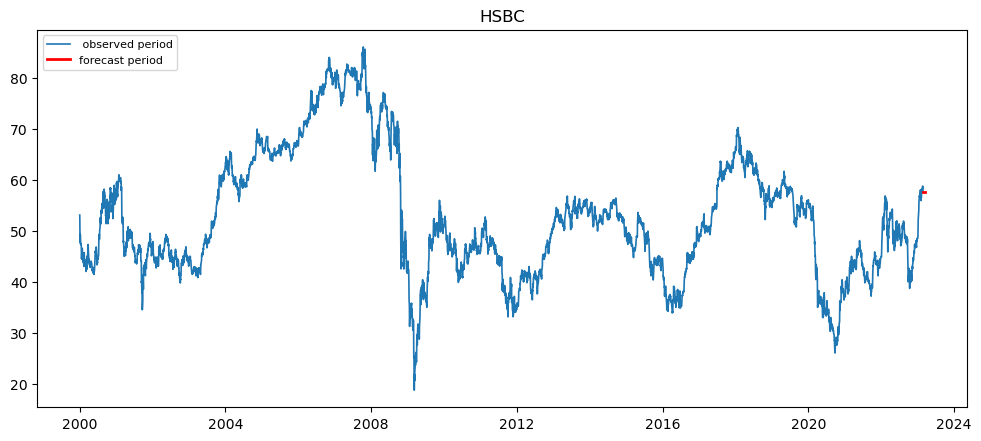

In [54]:
HSBCfc2=HSBCfc[(HSBCfc.index=='2023-03-13') | (HSBCfc.index=='2023-03-15') |(HSBCfc.index=='2023-03-17')  ]

df1 = pd.DataFrame(data=HSBCfc2.index, columns=['Date'])
df2 = pd.DataFrame(data=HSBCfc2.values, columns=['Price'])
HSBCfc2 = pd.merge(df1, df2, left_index=True, right_index=True)
HSBCfc2.set_index('Date', inplace = True)
import matplotlib.pyplot as plt
hsbcplot = hsbcprice_training.append(HSBCfc2)
plt.figure(figsize=(12,5),dpi=100)
plt.plot(hsbcprice_training,label=' observed period',linewidth=1.2)
plt.plot(HSBCfc,label='forecast period',linewidth=2,color='red')

plt.title('HSBC')
plt.legend(loc='upper left', fontsize=8)
plt.show

### Forecasting GALAXY ENT.

In [55]:
galaprice_training = GALA.loc[:,["Date","Adj Close"]]

galaprice_training.set_index('Date', inplace = True)
galaprice_training.index = pd.to_datetime(galaprice_training.index)
galaprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)
galaprice_training = galaprice_training.interpolate(method ='linear')

gala_forec_model = ARIMA(galaprice_training['Price'], order=(2,1,3))
gala_forec_model = gala_forec_model.fit()
galafc = gala_forec_model.forecast(24, alpha=0.05) 

galafc.index = pd.DatetimeIndex(['2023-02-22','2023-02-23','2023-02-24','2023-02-25','2023-02-26','2023-02-27','2023-02-28','2023-03-01','2023-03-02','2023-03-03','2023-03-04','2023-03-05',
                             '2023-03-06','2023-03-07','2023-03-08','2023-03-09','2023-03-10','2023-03-11','2023-03-12','2023-03-13',
                             '2023-03-14','2023-03-15','2023-03-16','2023-03-17'],dtype='datetime64[ns]',freq=None)
galafc

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

2023-02-22    51.657149
2023-02-23    51.706093
2023-02-24    51.775065
2023-02-25    51.837258
2023-02-26    51.869675
2023-02-27    51.861572
2023-02-28    51.817905
2023-03-01    51.756729
2023-03-02    51.701809
2023-03-03    51.673440
2023-03-04    51.681001
2023-03-05    51.719956
2023-03-06    51.774215
2023-03-07    51.822710
2023-03-08    51.847532
2023-03-09    51.840495
2023-03-10    51.805746
2023-03-11    51.757624
2023-03-12    51.714805
2023-03-13    51.693091
2023-03-14    51.699625
2023-03-15    51.730619
2023-03-16    51.773296
2023-03-17    51.811102
Name: predicted_mean, dtype: float64

In [56]:
galafc2=galafc[(galafc.index=='2023-03-13') | (galafc.index=='2023-03-15') |(galafc.index=='2023-03-17')  ]

galafc2
#plt.scatter(hsbcplot.index, hsbcplot)
#plt.show()

2023-03-13    51.693091
2023-03-15    51.730619
2023-03-17    51.811102
Name: predicted_mean, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

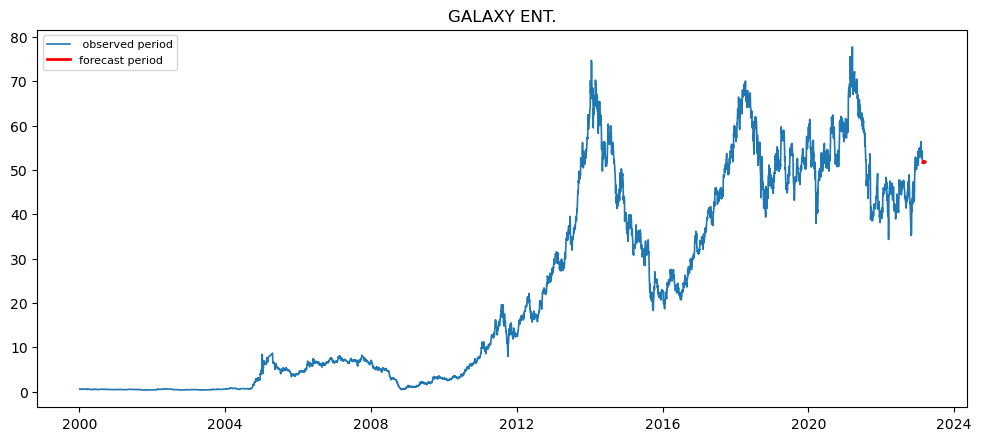

In [57]:
galafc2=galafc[(galafc.index=='2023-03-13') | (galafc.index=='2023-03-15') |(galafc.index=='2023-03-17')  ]

df1 = pd.DataFrame(data=galafc2.index, columns=['Date'])
df2 = pd.DataFrame(data=galafc2.values, columns=['Price'])
galafc2 = pd.merge(df1, df2, left_index=True, right_index=True)
galafc2.set_index('Date', inplace = True)


plt.figure(figsize=(12,5),dpi=100)
plt.plot(galaprice_training,label=' observed period',linewidth=1.2)
plt.plot(galafc,label='forecast period',linewidth=2,color='red')

plt.title('GALAXY ENT.')
plt.legend(loc='upper left', fontsize=8)
plt.show

### Forecasting Hang Lung

In [58]:
HLprice_training = HL.loc[:,["Date","Adj Close"]]

HLprice_training.set_index('Date', inplace = True)
HLprice_training.index = pd.to_datetime(HLprice_training.index)
HLprice_training.rename(columns={"Adj Close": "Price"}, inplace=True)
HLprice_training = HLprice_training.interpolate(method ='linear')

HL_forec_model = ARIMA(HLprice_training['Price'], order=(2,1,3))
HL_forec_model = HL_forec_model.fit()
HLfc = HL_forec_model.forecast(24, alpha=0.05) 

HLfc.index = pd.DatetimeIndex(['2023-02-22','2023-02-23','2023-02-24','2023-02-25','2023-02-26','2023-02-27','2023-02-28','2023-03-01','2023-03-02','2023-03-03','2023-03-04','2023-03-05',
                             '2023-03-06','2023-03-07','2023-03-08','2023-03-09','2023-03-10','2023-03-11','2023-03-12','2023-03-13',
                             '2023-03-14','2023-03-15','2023-03-16','2023-03-17'],dtype='datetime64[ns]',freq=None)
HLfc

/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/henryli/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index b

2023-02-22    16.083279
2023-02-23    16.076514
2023-02-24    16.065747
2023-02-25    16.058749
2023-02-26    16.050297
2023-02-27    16.043769
2023-02-28    16.036860
2023-03-01    16.031029
2023-03-02    16.025251
2023-03-03    16.020146
2023-03-04    16.015253
2023-03-05    16.010828
2023-03-06    16.006657
2023-03-07    16.002841
2023-03-08    15.999274
2023-03-09    15.995990
2023-03-10    15.992934
2023-03-11    15.990111
2023-03-12    15.987491
2023-03-13    15.985067
2023-03-14    15.982819
2023-03-15    15.980738
2023-03-16    15.978810
2023-03-17    15.977023
Name: predicted_mean, dtype: float64

In [59]:
HLfc2=HLfc[(HLfc.index=='2023-03-13') | (HLfc.index=='2023-03-15') |(HLfc.index=='2023-03-17')  ]
galafc2

,Price
Date,
2023-03-13,51.693091
2023-03-15,51.730619
2023-03-17,51.811102


<function matplotlib.pyplot.show(close=None, block=None)>

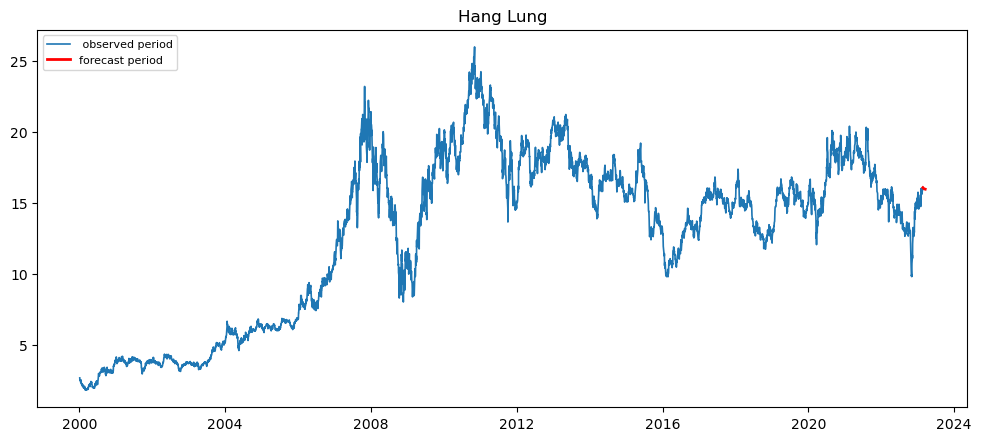

In [60]:
HLfc2=HLfc[(HLfc.index=='2023-03-13') | (HLfc.index=='2023-03-15') |(HLfc.index=='2023-03-17')  ]

df1 = pd.DataFrame(data=HLfc2.index, columns=['Date'])
df2 = pd.DataFrame(data=HLfc2.values, columns=['Price'])
HLfc2 = pd.merge(df1, df2, left_index=True, right_index=True)
HLfc2.set_index('Date', inplace = True)


plt.figure(figsize=(12,5),dpi=100)
plt.plot(HLprice_training,label=' observed period',linewidth=1.2)
plt.plot(HLfc,label='forecast period',linewidth=2,color='red')

plt.title('Hang Lung')
plt.legend(loc='upper left', fontsize=8)
plt.show